# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [47]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords, reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re

analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/martinrasumoff/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/martinrasumoff/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/martinrasumoff/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/martinrasumoff/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
# Read your api key environment variable
load_dotenv('example.env')
news_api = os.getenv("news_api")
news_api

'79a0cda5b8ed483a8a49574abeb92960'

In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_api)

In [14]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="bitcoin", language="en", page_size=100,sort_by="relevancy")
btc_headlines

{'status': 'ok',
 'totalResults': 12477,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'https://www.engadget.com/about/editors/richard-lawler',
   'title': "Tesla 'suspends' Bitcoin car purchases citing environmental impact",
   'description': "You can't buy a Tesla with Bitcoin anymore..",
   'url': 'https://www.engadget.com/elon-musk-bitcoin-221708146.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-05/a0f90c30-b36f-11eb-aff6-04fb28cf2f4b',
   'publishedAt': '2021-05-12T22:17:08Z',
   'content': 'Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars]'},
  {'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Alex Wilhelm',
   'title': 'What Square’s smashing earnings tell us about consumer bitcoin demand',
   'description': "Today we're talking Square earn

In [12]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum", language="en", page_size=100,sort_by="relevancy")
eth_headlines

{'status': 'ok',
 'totalResults': 5026,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Manish Singh',
   'title': 'Vitalik Buterin donates $1 billion worth of ‘meme coins’ to India Covid Relief Fund',
   'description': 'Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and “meme coins” worth $1.5 billion in one of the largest-ever individual philanthropy efforts. Buterin transferred 500 ETH and over 50 trillion SHIB (Shiba Inu), a meme coin, worth aroun…',
   'url': 'http://techcrunch.com/2021/05/12/vitalik-buterin-donates-1-billion-worth-of-meme-coins-to-india-covid-relief-fund/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2017/09/vitalik-buterin-147a2566.jpg?w=600',
   'publishedAt': '2021-05-12T22:46:10Z',
   'content': 'Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and meme coins worth $1.5 billion in one of the largest-ever individual philanthropy efforts.\r\nButerin transferred 50

In [15]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = pd.DataFrame.from_dict(btc_headlines["articles"])

btc_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'engadget', 'name': 'Engadget'}",https://www.engadget.com/about/editors/richard...,Tesla 'suspends' Bitcoin car purchases citing ...,You can't buy a Tesla with Bitcoin anymore..,https://www.engadget.com/elon-musk-bitcoin-221...,https://s.yimg.com/os/creatr-uploaded-images/2...,2021-05-12T22:17:08Z,Just weeks after Tesla started accepting Bitco...
1,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Alex Wilhelm,What Square’s smashing earnings tell us about ...,Today we're talking Square earnings and its bi...,http://techcrunch.com/2021/05/07/what-squares-...,https://techcrunch.com/wp-content/uploads/2020...,2021-05-07T18:17:36Z,Shares of Square are up more than 6% today aft...
2,"{'id': 'the-verge', 'name': 'The Verge'}",Sean O'Kane,Tesla stops taking Bitcoin for vehicle purchas...,Tesla has stopped accepting bitcoin as payment...,https://www.theverge.com/2021/5/12/22433153/te...,https://cdn.vox-cdn.com/thumbor/zRfsIkD2Sr-2KD...,2021-05-12T22:21:15Z,Image: Tesla\r\n\n \n\n Tesla has stopped acce...
3,"{'id': 'the-verge', 'name': 'The Verge'}",Chaim Gartenberg,Coinbase is down amid massive cryptocurrency p...,Cryptocurrency exchange Coinbase is experienci...,https://www.theverge.com/2021/5/19/22443701/co...,https://cdn.vox-cdn.com/thumbor/9inLHdPYtMB1py...,2021-05-19T13:47:36Z,Illustration by Alex Castro / The Verge\r\n\n ...
4,"{'id': 'mashable', 'name': 'Mashable'}",Tim Marcin,Mark Zuckerberg has a goat named Bitcoin and w...,"Mark Zuckerberg posted a picture of his two, f...",https://mashable.com/article/mark-zuckerberg-g...,https://mondrian.mashable.com/2021%252F05%252F...,2021-05-11T14:52:02Z,"Mark Zuckerberg posted a picture of his two, f..."


In [16]:
# Create the Ethereum sentiment scores DataFrame
eth_df = pd.DataFrame.from_dict(eth_headlines["articles"])

eth_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Manish Singh,Vitalik Buterin donates $1 billion worth of ‘m...,"Vitalik Buterin, the creator of Ethereum, on W...",http://techcrunch.com/2021/05/12/vitalik-buter...,https://techcrunch.com/wp-content/uploads/2017...,2021-05-12T22:46:10Z,"Vitalik Buterin, the creator of Ethereum, on W..."
1,"{'id': 'techcrunch', 'name': 'TechCrunch'}",David Riggs,Radical Ethereum entrepreneurs are redefining ...,Their investors call them disruptive innovator...,http://techcrunch.com/2021/05/04/radical-ether...,https://techcrunch.com/wp-content/uploads/2021...,2021-05-04T14:30:39Z,Their investors call them disruptive innovator...
2,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Connie Loizos,"Solana, a blockchain platform followed by top ...",Solana isn’t known yet outside of the crypto c...,http://techcrunch.com/2021/05/14/solana-a-bloc...,https://techcrunch.com/wp-content/uploads/2021...,2021-05-15T01:49:36Z,Solana isn’t known yet outside of the crypto c...
3,"{'id': 'cnn', 'name': 'CNN'}","Paul R. La Monica, CNN Business","Move over, Bitcoin. Ethereum is at an all-time...",Bitcoin prices continued their rebound Saturda...,https://www.cnn.com/2021/05/01/investing/ether...,https://cdn.cnn.com/cnnnext/dam/assets/2105010...,2021-05-01T17:24:45Z,New York (CNN Business)Bitcoin prices continue...
4,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Lucas Matney,CryptoPunks maker Larva Labs launches their ne...,"The creators behind CryptoPunks, one of the mo...",http://techcrunch.com/2021/05/03/cryptopunks-m...,https://techcrunch.com/wp-content/uploads/2021...,2021-05-03T18:08:48Z,"The creators behind CryptoPunks, one of the mo..."


In [17]:
# Describe the Bitcoin Sentiment
btc_analyzer = SentimentIntensityAnalyzer()

btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929
1,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.00,0.942
2,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816
3,2021-05-19,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.00,1.000
4,2021-05-11,"Mark Zuckerberg posted a picture of his two, f...",0.8455,0.217,0.00,0.783


In [20]:
print(f"Mean positive Score: {btc_df['positive'].mean()}")

Mean positive Score: 0.04883


In [22]:
# Describe the Ethereum Sentiment
# Describe the Bitcoin Sentiment
eth_analyzer = SentimentIntensityAnalyzer()

eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-12,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.000,0.940
1,2021-05-04,Their investors call them disruptive innovator...,-0.2144,0.054,0.111,0.835
2,2021-05-15,Solana isn’t known yet outside of the crypto c...,0.5499,0.106,0.000,0.894
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.000,1.000
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.000,0.909


In [27]:
print(f"BTC Mean positive Score: {btc_df['positive'].mean()}")
print(f"ETH Mean positive Score: {eth_df['positive'].mean()}")

print(f"BTC Highest Coumpund Score: {btc_df['compound'].max()}")
print(f"ETH Highest Compund Score: {eth_df['compound'].max()}")

print(f"BTC Mean positive Score: {btc_df['positive'].max()}")
print(f"ETH Mean positive Score: {eth_df['positive'].max()}")


BTC Mean positive Score: 0.04883
ETH Mean positive Score: 0.05399999999999998
BTC Highest Coumpund Score: 0.8455
ETH Highest Compund Score: 0.8225
BTC Mean positive Score: 0.275
ETH Mean positive Score: 0.256


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH with a score of 0.05399

Q: Which coin had the highest compound score?

A: BTC with a score of 0.8455

Q. Which coin had the highest positive score?

A: BTC with a score of 0.275

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [48]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [49]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [110]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase & # Remove the stop words
    output = [word.lower() for word in lem if word.lower() not in sw]
            
    return output

def tokenizer2(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase & # Remove the stop words
    output = [word.lower() for word in lem if word.lower() not in sw]
            
    return ' '.join(output)


In [71]:
# Create a new tokens column for Bitcoin

btc_df["tokens"] = ""

for row in range(len(btc_df["text"])):
    input_words = tokenizer(btc_df.iloc[row]["text"])    
    btc_df.at[row, 'tokens'] = input_words    

btc_df

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929,"[week, tesla, started, accepting, bitcoin, cur..."
1,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.00,0.942,"[shares, square, today, american, fintech, com..."
2,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816,"[image, tesla, tesla, ha, stopped, accepting, ..."
3,2021-05-19,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.00,1.000,"[illustration, alex, castro, verge, cryptocurr..."
4,2021-05-11,"Mark Zuckerberg posted a picture of his two, f...",0.8455,0.217,0.00,0.783,"[mark, zuckerberg, posted, picture, two, frank..."
...,...,...,...,...,...,...,...
95,2021-05-19,Institutional investors are switching out of b...,0.0000,0.000,0.00,1.000,"[institutional, investor, switching, bitcoin, ..."
96,2021-05-12,Cryptocurrency ether hit a record high on Wedn...,0.4588,0.097,0.00,0.903,"[cryptocurrency, ether, hit, record, high, wed..."
97,2021-05-19,(Kitco News) It is red across the board in the...,0.1779,0.046,0.00,0.954,"[kitco, news, red, across, board, crypto, spac..."
98,2021-05-11,"By Reuters Staff\r\n(Adds details on bitcoin, ...",0.3818,0.082,0.00,0.918,"[reuters, staffadds, detail, bitcoin, update, ..."


In [72]:
# Create a new tokens column for Ethereum
eth_df["tokens"] = ""

for row in range(len(eth_df["text"])):
    input_words = tokenizer(eth_df.iloc[row]["text"])    
    eth_df.at[row, 'tokens'] = input_words    

eth_df

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-12,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.000,0.940,"[vitalik, buterin, creator, ethereum, wednesda..."
1,2021-05-04,Their investors call them disruptive innovator...,-0.2144,0.054,0.111,0.835,"[investor, call, disruptive, innovator, detrac..."
2,2021-05-15,Solana isn’t known yet outside of the crypto c...,0.5499,0.106,0.000,0.894,"[solana, isnt, known, yet, outside, crypto, co..."
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.000,1.000,"[new, york, cnn, businessbitcoin, price, conti..."
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.000,0.909,"[creator, behind, cryptopunks, one, popular, n..."
...,...,...,...,...,...,...,...
95,2021-05-19,"Bitcoin, Ethereum and other major cryptocurren...",-0.1779,0.062,0.083,0.855,"[bitcoin, ethereum, major, cryptocurrencies, p..."
96,2021-05-26,Opinions expressed by Entrepreneur contributor...,0.3182,0.076,0.000,0.924,"[opinions, expressed, entrepreneur, contributo..."
97,2021-05-19,"Bitcoin tumbled below the $40,000 mark on Wedn...",-0.0772,0.068,0.136,0.796,"[bitcoin, tumbled, mark, wednesday, threeandah..."
98,2021-05-08,"Back in 2015, David Grider was working at an i...",0.4767,0.091,0.000,0.909,"[back, david, grider, wa, working, investment,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [73]:
from collections import Counter
from nltk import ngrams

In [101]:
# Generate the Bitcoin N-grams where N=2
btc_words = []

for row in range(len(btc_df)):
    text = btc_df.iloc[row]["text"].split(" ")
    for word in text:
        btc_words.append(word)
    
#print(btc_words)
btc_bigrams = ngrams(btc_words, 2)
btc_bigrams

In [103]:
# Generate the Ethereum N-grams where N=2
eth_words = []

for row in range(len(eth_df)):
    text = eth_df.iloc[row]["text"].split(" ")
    for word in text:
        eth_words.append(word)
    
#print(btc_words)
eth_bigrams = ngrams(eth_words, 2)
eth_bigrams

In [84]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [102]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_bigrams,10)

[(('Elon', 'Musk'), 25),
 (('in', 'the'), 16),
 (('in', 'a'), 13),
 (('chars]', 'By'), 12),
 (('(Reuters)', '-'), 12),
 (('to', 'a'), 11),
 (('By', 'Reuters'), 11),
 (('seen', 'in'), 10),
 (('in', 'this'), 10),
 (('of', 'the'), 9)]

In [104]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_bigrams,10)

[(('of', 'the'), 17),
 (('of', 'a'), 14),
 (('in', 'the'), 14),
 (('in', 'this'), 13),
 (('virtual', 'currency'), 12),
 (('illustration', 'taken'), 12),
 (('of', 'virtual'), 11),
 (('this', 'illustration'), 11),
 (('representation', 'of'), 10),
 (('seen', 'in'), 10)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [105]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [113]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [114]:
big_string = ' '.join(btc_words)
input_words = process_text(big_string)

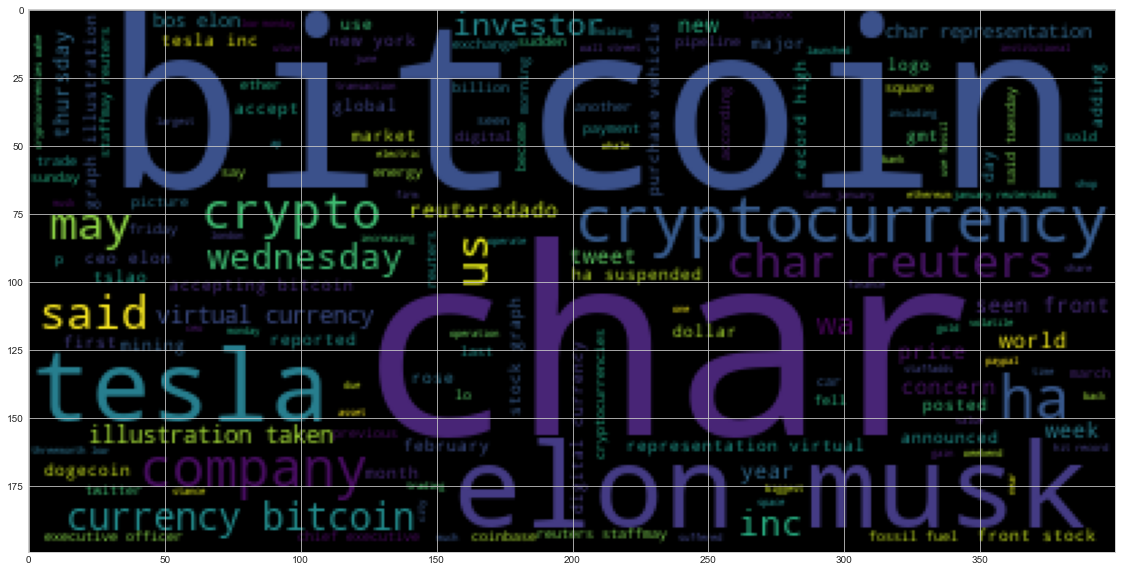

In [115]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(input_words)
plt.imshow(wc)

In [116]:
# Generate the Ethereum word cloud
big_string = ' '.join(eth_words)
input_words = process_text(big_string)

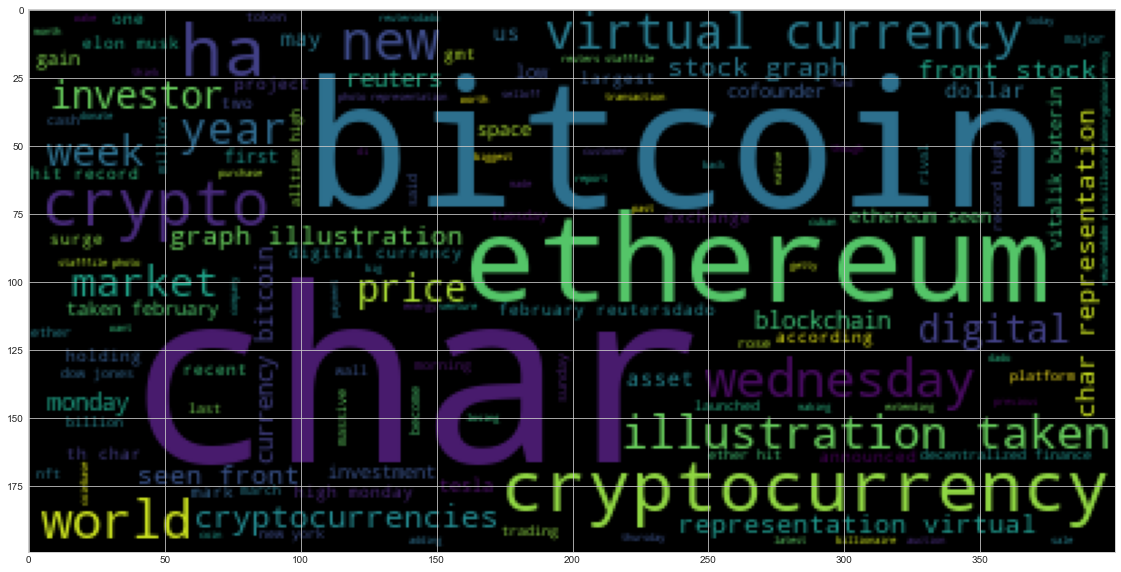

In [117]:
wc = WordCloud().generate(input_words)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [123]:
import spacy
from spacy import displacy

In [124]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [127]:
# Concatenate all of the Bitcoin text together
btc_string = ""

for row in range(len(btc_df)):
    btc_string += btc_df.iloc[row]["text"]
    


In [128]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_string)
# Add a title to the document


In [129]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [131]:
# List all Entities
print([ent.text for ent in btc_doc.ents])

['Just weeks', 'Tesla', 'Bitcoin', 'Elon Musk', 'Square', 'more than 6%', 'today', 'American', '$5.06 billion', '2021', '3.36', 'Tesla', 'Elon Musk', 'Alex Castro', 'The Verge\r\n\n \n\n Cryptocurrency', 'Coinbase', 'this morning', 'Coinbase', 'Bin', 'Zuckerberg', 'two', 'Max', 'Bitcoin', '+1482 chars]Last week', 'Musk', 'Dogecoin', 'Elon Musk', 'March', 'Musk', 'Tesla', 'Earlier this year', 'EV', '1.5', 'Elon Musk', 'Bitcoin', 'Bitcoin', 'Ethereum', 'Altcoins', 'Tuesday night', 'Wednesday', 'morning', 'months', 'hundreds of billions', 'Babel Finance', 'Monday', 'hours-long', 'this morning', 'May 19th', 'CNN', 'Saturday', 'about 6%', 'nearly $58,000', 'PayPals', 'Wednesday', 'Jose Fernandez da Pontethe', 'more than 5,500 miles', 'the United States', 'Photo', 'Michele Doying', 'Verge', 'Iran', 'Last week', 'Trump', 'This week', 'Elon Musk’s', 'Musk', 'Dogecoin', 'Twitter', 'Australian', 'London High Court', '16', 'around 4 billion pounds', 'about $50,000', 'Asian', 'Thursday', 'as much 

---

### Ethereum NER

In [132]:
# Concatenate all of the Ethereum text together
eth_string = ""

for row in range(len(eth_df)):
    eth_string += eth_df.iloc[row]["text"]

In [134]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_string)

# Add a title to the document
# YOUR CODE HERE!

In [135]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [136]:
# List all Entities
print([ent.text for ent in eth_doc.ents])

['Vitalik Buterin', 'Ethereum', 'Wednesday', 'Ethereum', '$1.5 billion', 'Buterin', '500', 'ETH', 'North Carolina', 'Josh Stein', 'Madison Campbell', 'Liesel Vaidya', 'Anatoly Yakovenko', 'chars]New York', 'CNN', 'Saturday', 'about 6%', 'nearly $58,000', 'CryptoPunks', 'one', 'NFT', 'Meebits', '20,000', '3D', 'Ethereum', 'Altcoins', 'Tuesday night', 'Wednesday', 'morning', 'months', 'hundreds of billions', 'Reuters', 'February 19, 2021', 'SINGAPORE', 'February 19, 2021', 'Dado Ruvic/IllustrationCryptocurrency', 'Dfinity', 'July 2018', 'Swiss', 'Dominic Williams', 'StockMarketUS Stock Futures Edge Higher', 'Monday', 'U.S.', 'Monday', 'Spanish', 'AI', 'Cryptocurrencies', 'today', 'Vitalik Buterin', '27-year-old', 'February 19, 2021', 'Dado Ruvic/IllustrationCryptocurrency', 'Dow Jones Indices', 'Reuters', 'SINGAPORE', 'May 3', 'Reuters', 'Monday', '3,000', 'last weeks', 'Europe', 'Tuesday', 'Banksy', 'Love', 'Air', 'first', 'chars]NEW YORK', 'May 7', 'Reuters', 'this year', 'Reuters', 'S

---